In [ ]:
import pandas as pd

In [ ]:
import numpy as np

# Generate synthetic correlated data
np.random.seed(0)
word_entered = np.arange(1, 21)
word_generated = word_entered * 2 + np.random.normal(0, 2, size=20)

df = pd.DataFrame({
    'word_entered': word_entered,
    'word_generated': word_generated
})


In [16]:
df1 = df[:5].copy()
df1 = pd.concat([df1, df.tail(1)], ignore_index=True)
df1

,word_entered,word_generated
0,1,5.528105
1,2,4.800314
2,3,7.957476
3,4,12.481786
4,5,13.735116
5,20,38.291809


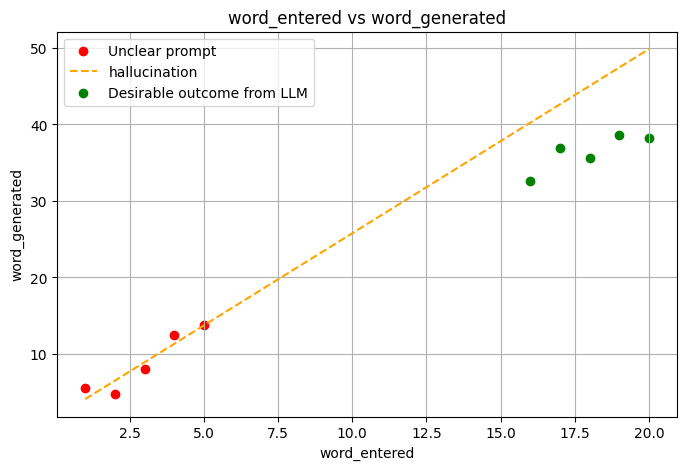

In [28]:
from numpy import polyfit, polyval

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
# First 5 points
plt.scatter(df['word_entered'][:5], df['word_generated'][:5], color='red', label='Unclear prompt')

# Linear regression line for all data

slope, intercept = polyfit(df['word_entered'][:5], df['word_generated'][:5], 1)
x_vals = np.array([df['word_entered'].min(), df['word_entered'].max()])
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='orange', linestyle='--', label='hallucination')

# Last 5 points
plt.scatter(df['word_entered'][-5:], df['word_generated'][-5:], color='green', label='Desirable outcome from LLM')

plt.xlabel('word_entered')
plt.ylabel('word_generated')
plt.title('word_entered vs word_generated')
plt.grid(True)
plt.legend()
plt.show()

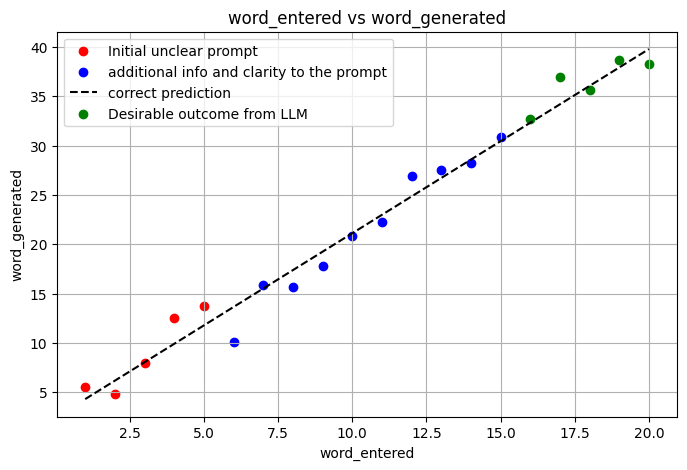

In [27]:


plt.figure(figsize=(8, 5))
# First 5 points
plt.scatter(df['word_entered'][:5], df['word_generated'][:5], color='red', label='Initial unclear prompt')


# Middle points
plt.scatter(df['word_entered'][5:-5], df['word_generated'][5:-5], color='blue', label='additional info and clarity to the prompt')
slope, intercept = polyfit(df['word_entered'][0:-5], df['word_generated'][0:-5], 1)
x_vals = np.array([df['word_entered'].min(), df['word_entered'].max()])
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='black', linestyle='--', label='correct prediction')
# Last 5 points
plt.scatter(df['word_entered'][-5:], df['word_generated'][-5:], color='green', label='Desirable outcome from LLM')

plt.xlabel('word_entered')
plt.ylabel('word_generated')
plt.title('word_entered vs word_generated')
plt.grid(True)
plt.legend()
plt.show()